In [1]:
#reading the test and train datasets

import pandas as pd


train=pd.read_csv('1676558209_8416622_cleveland-train.csv')
train=train.rename(columns={"heartdisease::category|-1|1": "output"})
train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,-1
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,-1
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,-1
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
5,57,1,4,140,192,0,0,148,0,0.4,2,0,6,-1
6,56,0,2,140,294,0,2,153,0,1.3,2,0,3,-1
7,44,1,2,120,263,0,0,173,0,0.0,1,0,7,-1
8,52,1,3,172,199,1,0,162,0,0.5,1,0,7,-1
9,57,1,3,150,168,0,0,174,0,1.6,1,0,3,-1


In [2]:
test=pd.read_csv('1676558209_8421676_cleveland-test.csv')
test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3
3,62,0,4,140,268,0,2,160,0,3.6,3,2,3
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7
5,56,1,3,130,256,1,2,142,1,0.6,2,1,6
6,64,1,1,110,211,0,2,144,1,1.8,2,0,3
7,66,0,1,150,226,0,0,114,0,2.6,3,0,3
8,43,1,4,150,247,0,0,171,0,1.5,1,0,3
9,40,1,4,110,167,0,2,114,1,2.0,2,0,7


In [3]:
#checking number of rows of data in train and test dataset

print("Length of Train File: "+str(len(train)))
print("Length of Test File: "+str(len(test)))

Length of Train File: 152
Length of Test File: 145


In [4]:
#adding bias to both train and test datasets

train.insert(0, 'bias', 1)
test.insert(0, 'bias', 1)

In [5]:
#creating split on data

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train = train.drop('output', axis = 1)
Y_train = train['output']
X_test = test


# normalising the train and test data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#convert data into arrays

X_train = X_train.T
Y_train = Y_train.values.reshape(-1, 1)
X_test = X_test.T
Y_train =np.transpose(Y_train)

#checking shape of the matrices

print("Shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of X_test",X_test.shape)

Shape of X_train (14, 152)
Shape of Y_train (1, 152)
Shape of X_test (14, 145)


In [6]:
#calculating the sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
import time
#training the model

def logistic_regression(X,Y, learning_rate, iterations):
    start_time = time.time()
    #m is total number of observations
    m = X.shape[1]
    #n is total number of features
    n = X.shape[0]
    #W is the weight vector
    W = np.zeros((n,1))
    B = 0
    stopped = False
    threshold = 0
    #cost_list to store the cross-entropy error during each iteration
    cost_list = []
    #error_list to store the train set error during each iteration
    error_list = []
    gradient_norm_list = []
    tolerance = 1e-6
    
    for i in range(iterations):
        Z= np.dot(W.T,X)+B
        A = sigmoid(Z)
        cost = -(1/m)*(np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)))
        cost_list.append(cost)
        
        
        # calculate the classification error
        Y_pred = (A >= 0.5).astype(int)
        train_error = (1/m) * np.sum(Y_pred != Y)
        error_list.append(train_error)
        
        dW = (1/m)*np.dot(A-Y,X.T)
        dB = (1/m)*np.sum(A-Y)
        
        W = W-learning_rate*dW.T
        B = B-learning_rate*dB
        gradient_norm = np.linalg.norm(dW)
        gradient_norm_list.append(gradient_norm)
        
        if gradient_norm < tolerance:
            print("Gradient descent converged at iteration", i)
            stopped_iteration = i
            break
        
    end_time = time.time()
    execution_time = end_time - start_time
        
    return W,B, cost_list, execution_time, error_list



#calling the logistic regression model

iterations = 10000
learning_rate = 1e-5

W, B, cost_list, execution_time, error_list = logistic_regression(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

average_cost = np.mean(cost_list)
average_error = error_list[-1]
print("the cross entropy errors is : ",average_cost)
print("the train error is : ",average_error)
print("the time taken to train the model is : ",execution_time)

the cross entropy errors is :  0.6140686134818756
the train error is :  0.6907894736842105
the time taken to train the model is :  0.7102601528167725


In [8]:
def predict(X, W, B):
    # calculate predicted probability
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    # convert probability to binary prediction
    Y_prediction = (A > 0.5).astype(int)
    
    return Y_prediction

# get the learned parameters and use them to make predictions on the test data
W, B, _ , _, _= logistic_regression(X_train, Y_train, learning_rate, iterations)
Y_pred = predict(X_test, W, B)

mask = Y_pred == 0
Y_pred[mask] = -1

print(Y_pred)

[[ 1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1
  -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  -1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1
  -1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1
   1 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1
  -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1
  -1]]


Text(0, 0.5, 'cost')

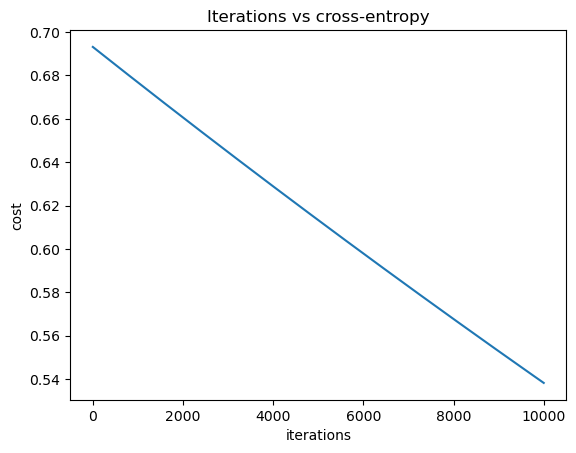

In [9]:
#plotting graph on number of interations vs the change in cross-entropy value

import matplotlib.pyplot as plt

plt.plot(np.arange(iterations), cost_list)
plt.title('Iterations vs cross-entropy')
plt.xlabel('iterations')
plt.ylabel('cost')

In [10]:
#output the predictions as a file 
Y_pred = Y_pred.reshape(-1)

predictions_df = pd.DataFrame({'output': Y_pred})
predictions_df.to_csv('prediction.csv', sep=' ', header=False, index=False)